<a href="https://colab.research.google.com/github/zangell44/DS-Sprint-01-Dealing-With-Data/blob/master/module2-sampling-confidence-intervals-and-hypothesis-testing/LS_DS_142_Sampling_Confidence_Intervals_and_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 142
## Sampling, Confidence Intervals, and Hypothesis Testing

## Prepare - examine other available hypothesis tests

If you had to pick a single hypothesis test in your toolbox, t-test would probably be the best choice - but the good news is you don't have to pick just one! Here's some of the others to be aware of:

In [70]:
import numpy as np
from scipy.stats import chisquare  # One-way chi square test

# Chi square can take any crosstab/table and test the independence of rows/cols
# The null hypothesis is that the rows/cols are independent -> low chi square
# The alternative is that there is a dependence -> high chi square
# Be aware! Chi square does *not* tell you direction/causation

ind_obs = np.array([[1, 1], [2, 2]]).T
print(ind_obs)
print(chisquare(ind_obs, axis=None))

dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)
print(chisquare(dep_obs, axis=None))

[[1 2]
 [1 2]]
Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)
[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]
Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)


In [71]:
# Distribution tests:
# We often assume that something is normal, but it can be important to *check*

# For example, later on with predictive modeling, a typical assumption is that
# residuals (prediction errors) are normal - checking is a good diagnostic

from scipy.stats import normaltest
# Poisson models arrival times and is related to the binomial (coinflip)
sample = np.random.poisson(5, 1000)
print(normaltest(sample))  # Pretty clearly not normal

NormaltestResult(statistic=30.253740577901368, pvalue=2.6945342301113334e-07)


In [72]:
# Kruskal-Wallis H-test - compare the median rank between 2+ groups
# Can be applied to ranking decisions/outcomes/recommendations
# The underlying math comes from chi-square distribution, and is best for n>5
from scipy.stats import kruskal

x1 = [1, 3, 5, 7, 9]
y1 = [2, 4, 6, 8, 10]
print(kruskal(x1, y1))  # x1 is a little better, but not "significantly" so

x2 = [1, 1, 1]
y2 = [2, 2, 2]
z = [2, 2]  # Hey, a third group, and of different size!
print(kruskal(x2, y2, z))  # x clearly dominates

KruskalResult(statistic=0.2727272727272734, pvalue=0.6015081344405895)
KruskalResult(statistic=7.0, pvalue=0.0301973834223185)


And there's many more! `scipy.stats` is fairly comprehensive, though there are even more available if you delve into the extended world of statistics packages. As tests get increasingly obscure and specialized, the importance of knowing them by heart becomes small - but being able to look them up and figure them out when they *are* relevant is still important.

## Live Lecture - let's explore some more of scipy.stats

In [0]:
from scipy import stats
b1 = stats.binom(n=100, p=0.6) # returns a binomial distribution object

In [74]:
print (b1.median())
print (b1.mean())
print (b1.std())

60.0
60.0
4.898979485566356


In [75]:
help(b1.rvs)

Help on method rvs in module scipy.stats._distn_infrastructure:

rvs(size=None, random_state=None) method of scipy.stats._distn_infrastructure.rv_frozen instance



In [76]:
b1.rvs(size=10)

array([43, 66, 59, 58, 54, 55, 68, 59, 56, 55])

In [0]:
# confidence intervals
# similar to hypothesis testing, but centered as sample mean
# better than reporting the "point estimate" sample mean

import numpy as np
from scipy import stats

def confidence_interval(data=None, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data
  
  Parameters
  ----------
  
  data : iterable
  
  confidence : level of confidence for the interval (float)
  
  Returns
  ----------
  
  tuple of (mean, lower bound, uppoer bound)
  
  """
  
  if len(data) == 0:
    return None
  
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)

  interval = stderr * stats.t.ppf((1+confidence) / 2, n-1) 
  
  return (mean, mean-interval, mean+interval)


  

In [0]:
coins = np.random.binomial(n=1, p=0.6, size=100)

coinflip_conf = confidence_interval(data=coins, confidence=0.9)

In [0]:
# printing confidence interval nicely

def print_confidence_interval(confidence_interval):
  """
  Prints a confidence interval nicely
  
  Parameters
  ----------
  
  confidence_interval : tuple of the form (mean, lower bound, upper bound)
  
  Returns
  ---------
  
  None, prints confidence interval
  """
  
  print ('Mean: {}'.format(confidence_interval[0]))
  print ('Lower Bound: {}'.format(confidence_interval[1]))
  print ('Upper Bound: {}'.format(confidence_interval[2]))
  
  s = "Our mean lies in the interval [{0}, {1}]".format(confidence_interval[1], 
                                                        confidence_interval[2])
  print (s)

In [80]:
print_confidence_interval(coinflip_conf)

Mean: 0.66
Lower Bound: 0.5809495693071084
Upper Bound: 0.7390504306928917
Our mean lies in the interval [0.5809495693071084, 0.7390504306928917]


## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):

1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.

# Congress Data Set

## Welch's T Test Function

In [0]:
# t-test function for welch's t-test
from __future__ import division
from collections import namedtuple

import scipy.stats as stats

TtestResults = namedtuple("Ttest", "T p mean low high")

# https://onlinecourses.science.psu.edu/stat414/node/203/

def t_welch(x, y, alpha=0.01, tails=2):
    """Welch's t-test for two unequal-size samples, not assuming equal variances
    """
    assert tails in (1,2), "invalid: tails must be 1 or 2, found %s"%str(tails)
    
    # drop nulls if necessary
    if x.isnull().sum().sum() !=0:
      x = x.dropna()
    if y.isnull().sum().sum() !=0:
      y = y.dropna()  
    
    
    x, y = np.asarray(x), np.asarray(y)
    nx, ny = x.size, y.size
    vx, vy = x.var(), y.var()
    
    
    df = int((vx/nx + vy/ny)**2 / # Welch-Satterthwaite equation
        ((vx/nx)**2 / (nx - 1) + (vy/ny)**2 / (ny - 1)))
    
    mean_diff = x.mean() - y.mean()
    t_obs = (mean_diff) / np.sqrt(vx/nx + vy/ny)
    p_value = tails * stats.t.sf(abs(t_obs), df)
    
    
    ci_low = mean_diff - stats.t.ppf(1-alpha, df) * np.sqrt(vx/nx + vy/ny)
    ci_high = mean_diff + stats.t.ppf(1-alpha, df) * np.sqrt(vx/nx + vy/ny)
   
    return TtestResults(t_obs, p_value, mean_diff, ci_low, ci_high)

## Load and Clean Data

In [82]:
# load data and imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
names_poli = ['party',
         'handicapped-infants',
         'water-project-cost-sharing',
         'adoption-of-the-budget-resolution',
         'physician-fee-freeze',
         'el-salvador-aid',
         'religious-groups-in-schools',
         'anti-satellite-test-ban',
         'aid-to-nicaraguan-contras',
         'mx-missile',
         'immigration',
         'synfuels-corporation-cutback',
         'education-spending',
         'superfund-right-to-sue',
         'crime',
         'duty-free-exports',
         'export-administration-act-south-africa']

df_poli_raw = pd.read_csv(data_url, header=None, names=names_poli)

# first, map all question marks to np.nan
df_poli_raw.replace('?', np.nan, inplace=True)

# data cleaning and prepping

# note, based on the null count above, it seems like they left off the last
# column in the description of the data

# map 'y' and 'no' to binary variables, yes=1
df_poli = df_poli_raw.copy()
df_poli.replace('y', 1, inplace=True)
df_poli.replace('n', 0, inplace=True)

df_poli.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


## Calculating Confidence Intervals

In [0]:
# separate dataframes by party for convenience
df_rep = df_poli[df_poli['party']=='republican']
df_dem = df_poli[df_poli['party']=='democrat']

names = names_poli
issue_tests_99 = {}
issue_tests_95 = {}
issue_tests_90 = {}

for i in range (1, len(names)):
  issue_tests_99[names[i]] = t_welch(df_rep[names[i]], df_dem[names[i]], alpha=0.005)
  
for i in range (1, len(names)):
  issue_tests_95[names[i]] = t_welch(df_rep[names[i]], df_dem[names[i]], alpha=0.025)
  
for i in range (1, len(names)):
  issue_tests_90[names[i]] = t_welch(df_rep[names[i]], df_dem[names[i]], alpha=0.05)

## Visualizing Confidence Intervals

In [0]:
# coloring for issue support spectrum
import matplotlib
import matplotlib.pyplot as plt

cmap = plt.cm.bwr
norm = matplotlib.colors.Normalize(vmin=-100, vmax=100.0) # CALL THIS on a value to normalize it to a colormap

# function for plotting confidence intervals
def plot_congress_cis(ax, issue_tests, ci_s=None):
  ax.set_xlim(-100, 100)
  ax.set_ylim(0, 170)

  ax.set_xlabel('<----- Democrat                    Relative Margin of Support (%)                    Republican ----->')
  ax.set_ylabel('Issue Name')

  ax.text(x=-100, 
          y=180, 
          s='Republicans vs. Democrat Support of Key Issues',
          fontsize=18,
          fontweight='bold')

  ax.text(x=-100, 
          y=173, 
          s='How much of choice did Americans have in 1984? ' + ci_s,
          fontsize=12)

  ax.text(x=-75, 
          y=130, 
          s='Issues Relatively Favored by Democrats',
          fontsize=14,
          fontweight='bold')

  ax.text(x=25, 
          y=100, 
          s='Issues Relatively Favored by Republicans',
          fontsize=14,
          fontweight='bold')

  # confidence bound example labeling
  ax.text(x=issue_tests['crime'].high*100, 
          y=151, 
          s='Upper Confidence Bound',
          fontsize=10)
  ax.text(x=issue_tests['crime'].low*100-20, 
          y=151, 
          s='Lower Confidence Bound',
          fontsize=10)
  ax.arrow(x=issue_tests['crime'].high*100,y=150,dx=0,dy=-10)
  ax.arrow(x=issue_tests['crime'].low*100,y=150,dx=0,dy=-10)

  # line at x for clearer distinction
  ax.axvline(x=0.0, linewidth=2, color='black')

  # label by issue
  ax.set_yticks(range(10,170,10))
  ax.set_yticklabels(names[1:])

  y_cord = 7.5 # starting coordinate for rectangle plotting

  # plot issue confidence intervals
  for issue in issue_tests.keys():
    rec = plt.Rectangle((issue_tests[issue].low*100, y_cord),
                      (issue_tests[issue].high-issue_tests[issue].low)*100,
                      5,  
                      fill=True,
                      color=cmap(norm(issue_tests[issue].mean*100)),
                      linewidth=3)
    ax.add_patch(rec) # add rectangle to the plot
    y_cord += 10 # jump up 10 for next box



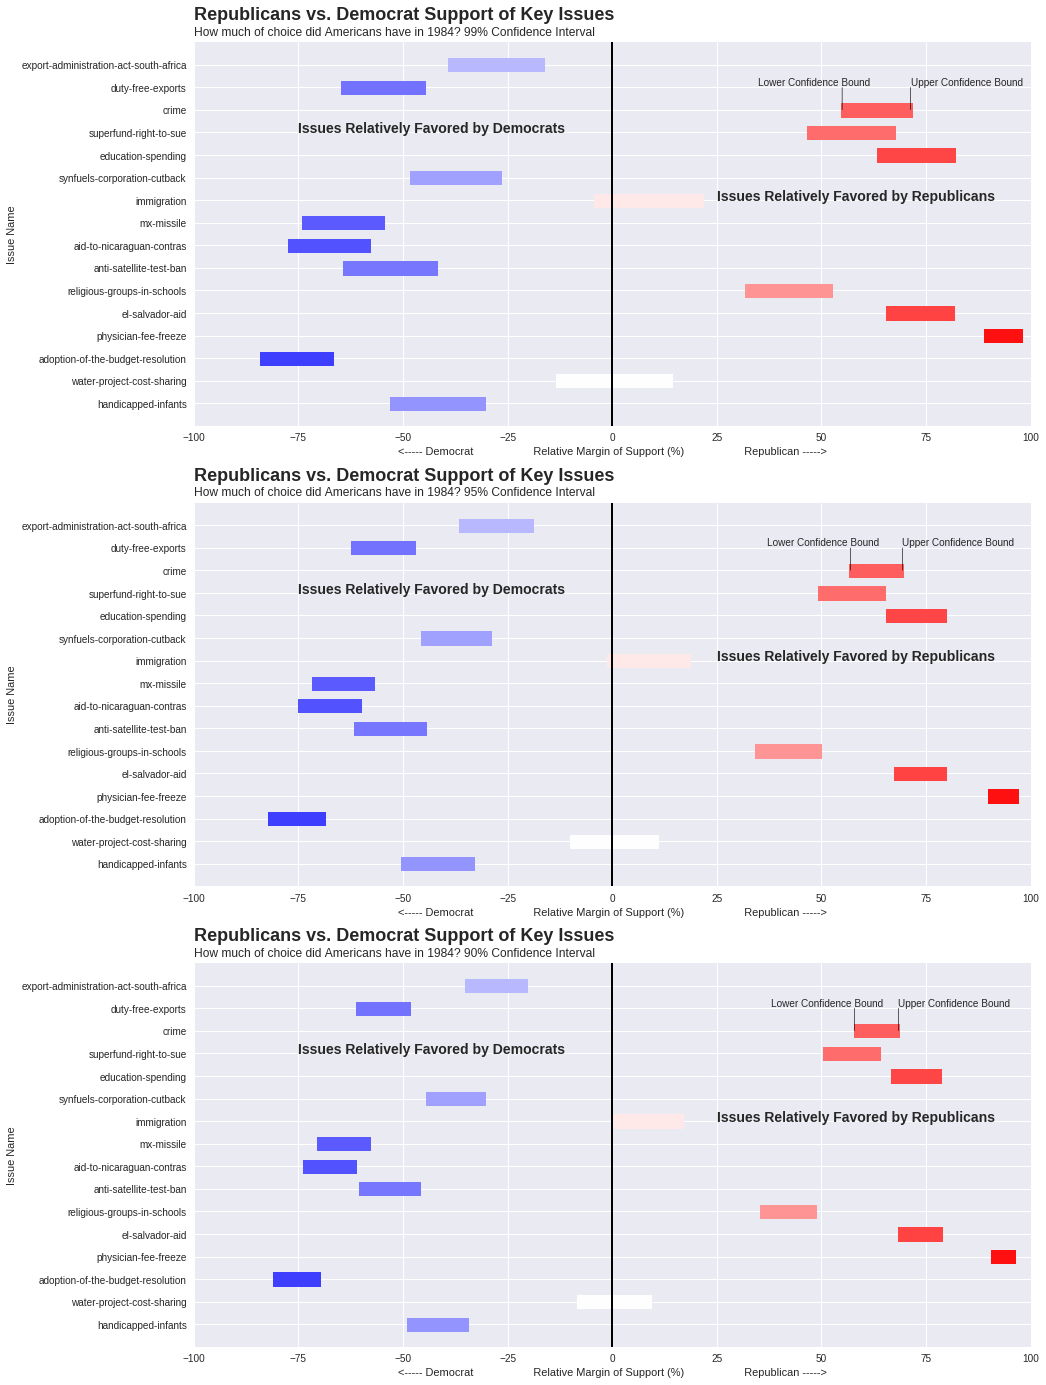

In [85]:
# initialize figure and plot
fig, axes = plt.subplots(3, 1, figsize=(15,24))

plot_congress_cis(axes[0], issue_tests_99, ci_s='99% Confidence Interval')
plot_congress_cis(axes[1], issue_tests_95, ci_s='95% Confidence Interval')
plot_congress_cis(axes[2], issue_tests_90, ci_s='90% Confidence Interval')

#plt.tight_layout()
plt.show()


# Drug Data Set

In [86]:
# drug data set - http://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29

drug_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip'

!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip


--2018-12-04 20:21:10--  http://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42989872 (41M) [application/zip]
Saving to: ‘drugsCom_raw.zip.1’

drugsCom_raw.zip.1  100%[===================>]  41.00M  17.2MB/s    in 2.4s    

2018-12-04 20:21:12 (17.2 MB/s) - ‘drugsCom_raw.zip.1’ saved [42989872/42989872]



In [91]:
!unzip drugsCom_raw.zip

Archive:  drugsCom_raw.zip
caution: filename not matched:  -y


In [0]:
# imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [0]:
drugs_test = pd.read_csv('drugsComTest_raw.tsv', sep='\t')
drugs_train = pd.read_csv('drugsComTrain_raw.tsv', sep='\t')

In [0]:
drugs_train.head()

In [0]:
drugs_train['drugName'].value_counts() # how many unique drugs do we have?

In [0]:
drugs_train['condition'].value_counts() # how many conditions do the drugs treat?

In [0]:
# utility functions
from collections import namedtuple
ConfidenceInterval= namedtuple("ConfidenceInterval", "mean low high")

def confidence_interval(data=None, alpha=0.05):
  """
  Calculate a confidence interval around a sample mean for given data
  
  Parameters
  ----------
  
  data : iterable
  
  confidence : level of confidence for the interval (float)
  
  Returns
  ----------
  
  tuple of (mean, lower bound, uppper bound)
  
  """
  if len(data) == 0: # make sure we have data
    return None
  
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf(1- (alpha / 2), n-1) 
  
  return ConfidenceInterval(mean, mean-interval, mean+interval)


def dataframe_query_equal(dataframe, column, column_value):
  """
  Returns a subset of the dataframe for all rows where column==column_value
  
  Parameters
  -----------
  dataframe : pandas dataframe
  
  column : column name in dataframe
  
  column_value : value in column used to select a subset of the dataframe
  
  Returns
  ----------
  dataframe : subset matching conditions provided
  """
  
  return dataframe[dataframe[column]==column_value]

In [189]:
# lets look at drug rating for one condition, pain

top_count = 10
condition = 'Pain'

df_condition = dataframe_query_equal(drugs_train, 'condition', condition)
top_drugs = df_condition['drugName'].value_counts()[:top_count].index.values

top_drugs_conf = {}

for drug in top_drugs:
  top_drugs_conf[drug] = confidence_interval(dataframe_query_equal(df_condition, 'drugName', drug)['rating'], alpha=0.05)
  
print (top_drugs_conf)

{'Tramadol': ConfidenceInterval(mean=6.509803921568627, low=6.163831206627156, high=6.8557766365100985), 'Acetaminophen / hydrocodone': ConfidenceInterval(mean=7.975903614457831, low=7.715761389153751, high=8.23604583976191), 'Oxycodone': ConfidenceInterval(mean=8.857651245551601, low=8.657885179608012, high=9.05741731149519), 'Acetaminophen / oxycodone': ConfidenceInterval(mean=8.546184738955823, low=8.274416375867093, high=8.817953102044553), 'Tapentadol': ConfidenceInterval(mean=6.333333333333333, low=5.888246861147656, high=6.77841980551901), 'Diclofenac': ConfidenceInterval(mean=7.820754716981132, low=7.4223460341975285, high=8.219163399764737), 'Hydromorphone': ConfidenceInterval(mean=8.133689839572192, low=7.721327776115048, high=8.546051903029335), 'Gabapentin': ConfidenceInterval(mean=6.4772727272727275, low=5.9951600700363965, high=6.9593853845090585), 'Nucynta': ConfidenceInterval(mean=6.451219512195122, low=5.965928098099962, high=6.936510926290282), 'Dilaudid': ConfidenceI

In [0]:
# lets modify the function from congressional data to 
# plot confidence intervals for drugs

# coloring for issue support spectrum
import matplotlib
import matplotlib.pyplot as plt

# function for plotting confidence intervals
def plot_drug_cis(ax, 
                  dataframe, 
                  condition, 
                  top_drug_count, 
                  alpha=0.05,
                  xlabel='Drug Rating',
                  ylabel='Drug Name',
                  title='Title',
                  subtitle='Sub-title',
                  cmap=plt.cm.bwr):
  
  """
  Parameters
  ----------
  ax : matplotlib.axes object 
    on which plotting will be performed
  
  dataframe : pandas dataframe
    must contain the columns drugName, condition, and rating
   
  condition : string
    condition must be found within the 'condition' column of dataframe
  
  top_drug_count : int
    the number of most popular drugs for which to plot confidence intervals
    
  alpha : float (0 < alpha < 1)
    confidence level plotted will be 1 - alpha
    
  """
  
  top_count = top_drug_count

  df_condition = dataframe_query_equal(drugs_train, 'condition', condition)
  top_drugs = df_condition['drugName'].value_counts()[:top_count].index.values

  top_drugs_conf = {} # dictionary to hold confidence intervals by drug

  for drug in top_drugs:
    top_drugs_conf[drug] = confidence_interval(dataframe_query_equal(df_condition, 'drugName', drug)['rating'], alpha=alpha)
  
  # plot sizing
  ax.set_xlim(0, 10) # hard coded to a 10 point scale
  ax.set_ylim(0, top_drug_count*10+10) # give 10 units of space for each drug plotted
  
  # labeling and titling
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.text(x=0, 
          y=top_drug_count*10+19, 
          s=title,
          fontsize=18,
          fontweight='bold')
  ax.text(x=0, 
          y=top_drug_count*10+12, 
          s=subtitle,
          fontsize=12
          )

  # label by issue
  ax.set_yticks(range(10,top_drug_count*10+10,10))
  ax.set_yticklabels(top_drugs)
  
  ax.set_xticks(range(0,11,1))

  y_cord = 7.5 # starting coordinate for rectangle plotting
  
  norm = matplotlib.colors.Normalize(vmin=0, vmax=10.0) # CALL THIS on a value to normalize it to a colormap

  # plot issue confidence intervals
  for drug in top_drugs_conf.keys():
    rec = plt.Rectangle((top_drugs_conf[drug].low, y_cord),
                      (top_drugs_conf[drug].high - top_drugs_conf[drug].low),
                      5,  
                      fill=True,
                      color=cmap(norm(top_drugs_conf[drug].mean))
                      )

    ax.add_patch(rec) # add rectangle to the plot
    y_cord += 10 # jump up 10 for next box



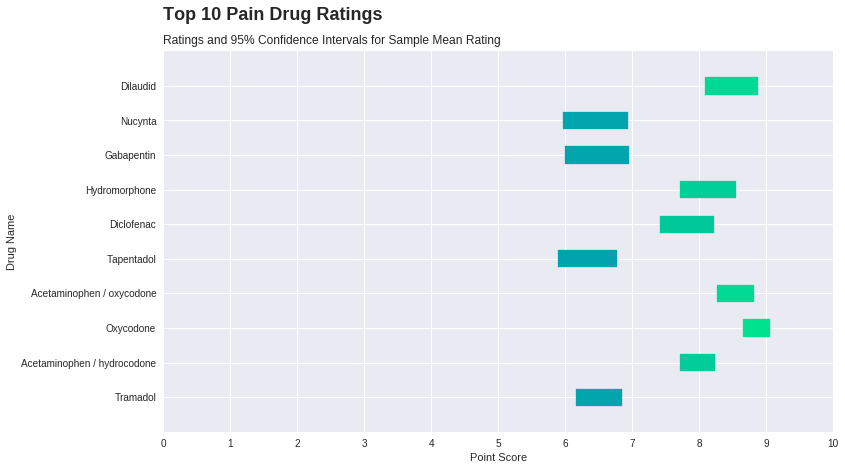

In [197]:
fig_pain, ax_pain = plt.subplots(figsize=(12,7))

plot_drug_cis(ax=ax_pain, 
              dataframe=drugs_train, 
              condition='Pain', 
              top_drug_count=10, 
              alpha=0.05,
              xlabel='Point Score',
              ylabel='Drug Name',
              title='Top 10 Pain Drug Ratings',
              subtitle='Ratings and 95% Confidence Intervals for Sample Mean Rating',
              cmap=plt.cm.winter)

plt.show()

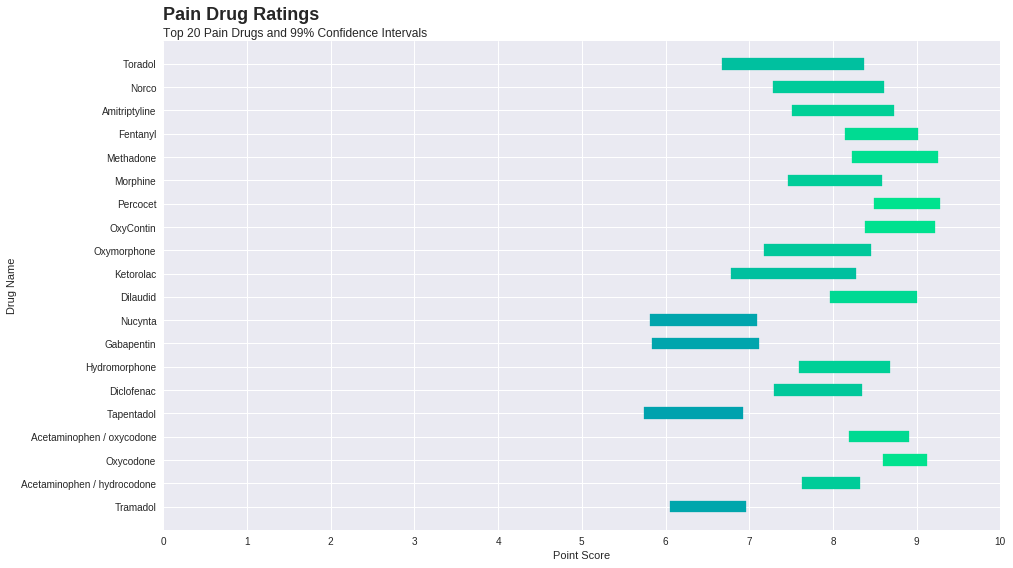

In [198]:
# more pain drugs test
fig_pain_twenty, ax_pain_twenty = plt.subplots(figsize=(15,9))

plot_drug_cis(ax=ax_pain_twenty, 
              dataframe=drugs_train, 
              condition='Pain', 
              top_drug_count=20, 
              alpha=0.01,
              xlabel='Point Score',
              ylabel='Drug Name',
              title='Pain Drug Ratings',
              subtitle='Top 20 Pain Drugs and 99% Confidence Intervals',
              cmap=plt.cm.winter)

plt.show()

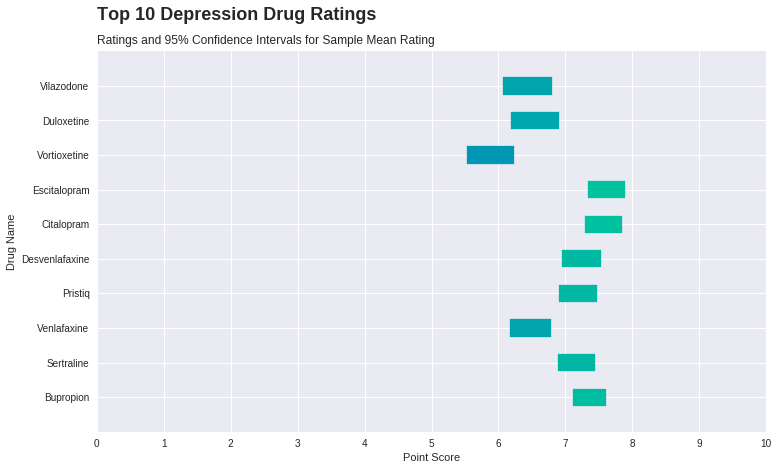

In [199]:
# try the function on another class of drugs, for Depression
fig_pain, ax_pain = plt.subplots(figsize=(12,7))

plot_drug_cis(ax=ax_pain, 
              dataframe=drugs_train, 
              condition='Depression', 
              top_drug_count=10, 
              alpha=0.05,
              xlabel='Point Score',
              ylabel='Drug Name',
              title='Top 10 Depression Drug Ratings',
              subtitle='Ratings and 95% Confidence Intervals for Sample Mean Rating',
              cmap=plt.cm.winter)

plt.show()

For all of the above charts, we can interpret the x% confidence interval as so:

"Based on the sample data, we are x% certain that the true mean lies within the lower and upper bounds of our confidence interval."

In [0]:
# just for fun, let's try the same thing with conditions

# function for plotting confidence intervals
def plot_condition_cis(ax, 
                  dataframe, 
                  conditions=None, 
                  top_condition_count=10, 
                  alpha=0.05,
                  xlabel='Average Drug Rating',
                  ylabel='Condition Name',
                  title='Title',
                  subtitle='Sub-title',
                  cmap=plt.cm.winter):
  
  """
  Parameters
  ----------
  ax : matplotlib.axes object 
    on which plotting will be performed
  
  dataframe : pandas dataframe
    must contain the columns drugName, condition, and rating
   
  conditions : list of strings
    list of conditions to plot, if not provided, most popular condition count will be used
  
  top_condition_count : int
    the number of most popular conditions for which to plot confidence intervals
    
  alpha : float (0 < alpha < 1)
    confidence level plotted will be 1 - alpha
    
  """
  if conditions is None: # if a list of conditions is not provided, use x most popular ones
    top_count = top_condition_count
    conditions = dataframe['condition'].value_counts()[:top_count].index.values

  conditions_conf = {} # dictionary to hold confidence intervals by drug

  for cond in conditions:
    conditions_conf[cond] = confidence_interval(dataframe_query_equal(dataframe, 'condition', cond)['rating'], alpha=alpha)
  
  # plot sizing
  ax.set_xlim(0, 10) # hard coded to a 10 point scale
  ax.set_ylim(0, len(conditions)*10+10) # give 10 units of space for each drug plotted
  
  # labeling and titling
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.text(x=0, 
          y=len(conditions)*10+19, 
          s=title,
          fontsize=18,
          fontweight='bold')
  ax.text(x=0, 
          y=len(conditions)*10+12, 
          s=subtitle,
          fontsize=12
          )

  # label by issue
  ax.set_yticks(range(10,len(conditions)*10+10,10))
  ax.set_yticklabels(conditions)
  
  ax.set_xticks(range(0,11,1))

  y_cord = 7.5 # starting coordinate for rectangle plotting
  
  norm = matplotlib.colors.Normalize(vmin=0, vmax=10.0) # CALL THIS on a value to normalize it to a colormap

  # plot issue confidence intervals
  for cond in conditions_conf.keys():
    rec = plt.Rectangle((conditions_conf[cond].low, y_cord),
                      (conditions_conf[cond].high - conditions_conf[cond].low),
                      5,  
                      fill=True,
                      color=cmap(norm(conditions_conf[cond].mean))
                      )

    ax.add_patch(rec) # add rectangle to the plot
    y_cord += 10 # jump up 10 for next box

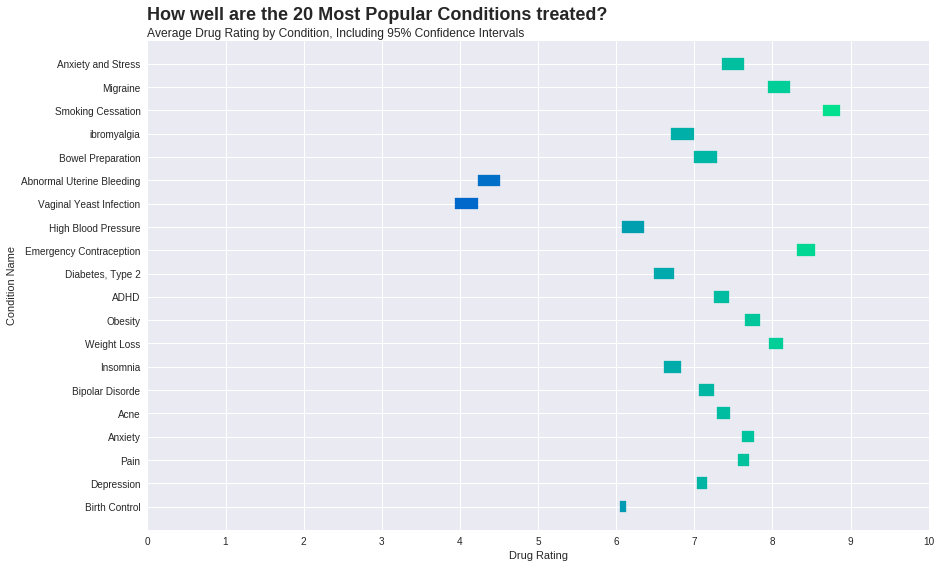

In [211]:
# ratings for the 20 most popular conditions

fig_cond, ax_cond = plt.subplots(figsize=(14,9))

plot_condition_cis(ax=ax_cond, 
                  dataframe=drugs_train, 
                  conditions=None, 
                  top_condition_count=20, 
                  alpha=0.05,
                  xlabel='Drug Rating',
                  ylabel='Condition Name',
                  title='How well are the 20 Most Popular Conditions treated?',
                  subtitle='Average Drug Rating by Condition, Including 95% Confidence Intervals',
                  cmap=plt.cm.winter)

plt.show()

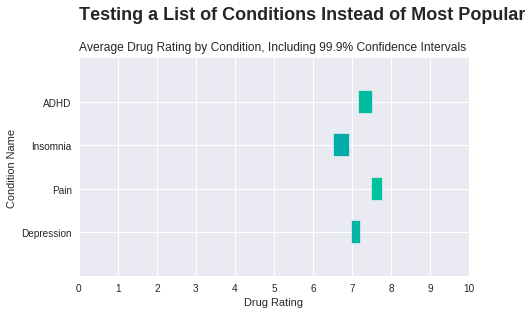

In [216]:
# try passing in a list of conditions instead
fig_cond2, ax_cond2 = plt.subplots(figsize=(7,4))

plot_condition_cis(ax=ax_cond2, 
                  dataframe=drugs_train, 
                  conditions=['Depression', 'Pain', 'Insomnia', 'ADHD'], 
                  top_condition_count=20, 
                  alpha=0.001,
                  xlabel='Drug Rating',
                  ylabel='Condition Name',
                  title='Testing a List of Conditions Instead of Most Popular',
                  subtitle='Average Drug Rating by Condition, Including 99.9% Confidence Intervals',
                  cmap=plt.cm.winter)

plt.show()

Alright I think I've proved my point there, the functions seem to work well.

I'd like to write a function to visualize confidence intervals for a given distribution. 

In [0]:
def visualize_confidence(ax, 
                         data, 
                         alpha=0.05,
                         xlabel='Value',
                         ylabel='Frequency',
                         title=''):
  
  
  # manipulating data to plot distributions
  data = np.array(data)
  density = scipy.stats.gaussian_kde(data) 
  data_bins = np.linspace(0.0, 10.0, 50)
  
  # calculating confidence interval
  conf = confidence_interval(data=data, alpha=alpha)
  
  # plotting
  ax.plot(data_bins, density(data_bins))
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.set_title(title)

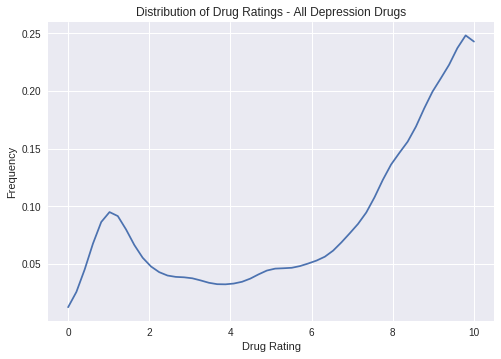

In [244]:
test_data = dataframe_query_equal(drugs_train, 'condition', 'Depression')['rating']

fig_test, ax_test = plt.subplots()

visualize_confidence(ax=ax_test, 
                     data=test_data, 
                     alpha=0.05,
                     xlabel='Drug Rating',
                     ylabel='Frequency',
                     title='Distribution of Drug Ratings - All Depression Drugs')

plt.show()

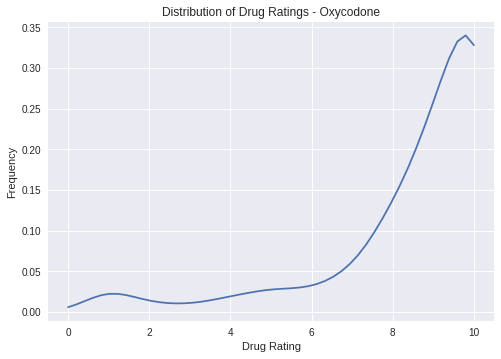

In [245]:
# seems like the function works, but drug rating is for sure 
# not normally distributed among all depression drugs

# lets try to find a drug that is for better plotting
test_data_normal = dataframe_query_equal(drugs_train, 'drugName', 'Oxycodone')['rating']

fig_test, ax_test = plt.subplots()

visualize_confidence(ax=ax_test, 
                     data=test_data_normal, 
                     alpha=0.05,
                     xlabel='Drug Rating',
                     ylabel='Frequency',
                     title='Distribution of Drug Ratings - Oxycodone')

plt.show()